In [1]:
import pandas as pd
from astropy.table import Table
import matplotlib.pyplot as plt
import multiprocessing as multi
from datetime import datetime
import scipy.integrate as integrate
import numpy as np 
from astropy.cosmology import Planck18 as cosmo
from astropy.coordinates import SkyCoord
from astropy import units as u



In [2]:
data_address = 'Data/'
dpi = 120

In [3]:
%%time

table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North.fits', format='fits')

# print(table)

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_north = table[names].to_pandas()

# df_north = table.to_pandas()

print(datetime.now())
df_north.describe()

2021-08-25 12:32:15.794256
CPU times: user 963 ms, sys: 430 ms, total: 1.39 s
Wall time: 2.95 s


,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,...,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,3744.559966,3.480417,190.047421,526.441764,22.120926,13685.012243,6644.149003,1.141736,...,0.000347,0.987200,4730.584234,469.441013,55504.662428,22.352079,11135.404303,0.001025,94503.423641,0.846065
std,39.000977,17.995544,1299.838502,1.574778,141.918394,302.155323,10.049022,9395.847995,3555.650528,0.105764,...,0.000291,0.017168,1694.359294,280.849513,1132.356820,10.054813,5279.431163,0.031998,140132.725972,0.983210
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.141058,13.152102,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,0.000240,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6215.000000,1.000000
50%,184.641353,26.955008,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6803.000000,1.123701,...,0.000330,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.078796,42.385037,4670.000000,5.000000,252.000000,716.000000,31.000000,21619.000000,9101.000000,1.199142,...,0.000404,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.500000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,0.025111,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [4]:
df_north[['RA', 'DEC', 'Z']].describe()

,RA,DEC,Z
count,953255.000000,953255.000000,953255.000000
mean,184.895452,28.153315,0.455062
std,39.000977,17.995544,0.155204
min,108.937131,-3.628120,-0.011447
25%,152.141058,13.152102,0.352654
50%,184.641353,26.955008,0.489353
75%,217.078796,42.385037,0.564193
max,263.907507,68.737699,1.002166


2021-08-25 12:32:17.188576


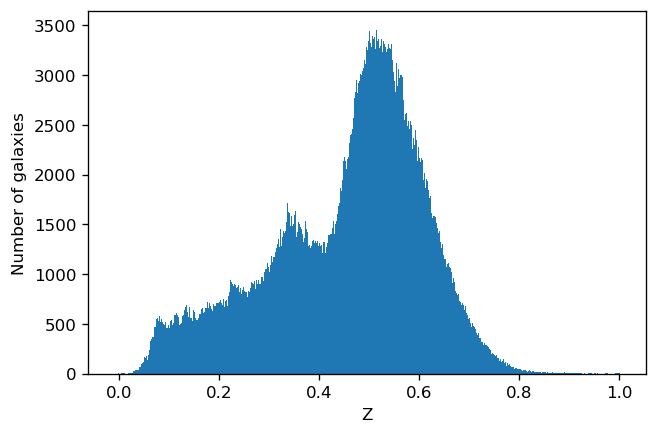

In [5]:
plt.figure(dpi = dpi)
plt.hist(df_north['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [39]:
df_north_pos_z = df_north[df_north['Z'] > 0].copy()
df_north_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,...,9.531930e+05,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,3744.575764,3.480431,190.045211,526.466500,22.121051,13685.160683,6644.178946,1.141741,...,3.469543e-04,0.987201,4730.550378,469.441076,55504.633551,22.352188,11135.269964,0.001025,94502.315741,0.846043
std,38.999948,17.995523,1299.835047,1.574764,141.917793,302.146071,10.049019,9395.851709,3555.646624,0.105763,...,2.913079e-04,0.017168,1694.391087,280.848799,1132.384028,10.054813,5279.554828,0.031999,140131.281732,0.983232
min,108.937131,-3.628120,308.000000,1.000000,11.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,2.023293e-08,0.600000,266.000000,1.000000,51581.000000,2.000000,0.000000,0.000000,-1.000000,-1.000000
25%,152.140573,13.151964,2887.000000,2.000000,86.000000,283.000000,15.000000,5269.000000,4138.000000,1.054627,...,2.396823e-04,0.973958,3962.000000,229.000000,55481.000000,15.000000,10293.000000,0.000000,6214.000000,1.000000
50%,184.639602,26.954585,3893.000000,3.000000,156.000000,504.000000,26.000000,12512.000000,6804.000000,1.123701,...,3.300774e-04,0.986072,4992.000000,451.000000,55926.000000,26.000000,13523.000000,0.000000,35616.000000,1.000000
75%,217.076180,42.384830,4670.000000,5.000000,252.000000,716.000000,31.000000,21620.000000,9101.000000,1.199153,...,4.038898e-04,1.000000,5976.000000,702.000000,56245.000000,31.000000,14678.000000,0.000000,133145.000000,1.000000
max,263.907507,68.737699,6793.000000,6.000000,872.000000,3518.000000,34.000000,32553.000000,12722.000000,1.791068,...,2.511126e-02,1.000000,7449.000000,1000.000000,56753.000000,34.000000,16027.000000,1.000000,872667.000000,15.000000


In [40]:
%%time

df_north_pos_z['r_comov[Mpc]'] =  cosmo.comoving_distance(df_north_pos_z['Z']).value


c = SkyCoord(ra = df_north_pos_z['RA'] * u.degree, 
             dec = df_north_pos_z['DEC'] * u.degree, 
             distance = df_north_pos_z['r_comov[Mpc]'])


df_north_pos_z['X_comov[Mpc]'] =  c.cartesian.x.value
df_north_pos_z['Y_comov[Mpc]'] =  c.cartesian.y.value
df_north_pos_z['Z_comov[Mpc]'] =  c.cartesian.z.value

df_north_pos_z.head()

CPU times: user 1min 5s, sys: 1.33 s, total: 1min 6s
Wall time: 1min 6s


,RA,DEC,RUN,RERUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,...,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
0,195.071285,-0.590771,745,b'301 ',2,242,263,7,31442,12561,...,55337,7,10371,0,35880,1,1829.793980,-1766.760758,-475.758853,-18.866497
1,195.022992,-0.610999,745,b'301 ',2,242,557,7,31442,12561,...,55337,7,10371,0,8843,1,2163.157822,-2089.106382,-560.672974,-23.067342
2,195.079741,0.348981,745,b'301 ',4,243,389,7,30058,1642,...,55337,7,10371,0,13065,2,2310.893919,-2231.276160,-601.198209,14.075248
3,195.170574,0.359864,745,b'301 ',4,243,722,7,30064,1643,...,55600,7,10372,0,12492,1,1953.334666,-1885.225766,-511.164956,12.268453
4,195.204289,0.347267,745,b'301 ',4,243,883,7,30064,1643,...,55337,7,10371,0,2060,1,2141.713005,-2066.708374,-561.678372,12.980747


In [8]:
%%time
df_north_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv')

CPU times: user 9.65 s, sys: 152 ms, total: 9.81 s
Wall time: 9.82 s


In [9]:
%%time
df_north_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_North_Comov.csv', 
                index_col = 0)
df_north_pos_z.describe()

CPU times: user 1.16 s, sys: 80.1 ms, total: 1.24 s
Wall time: 1.24 s


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1768.422445,-1162.430151,-97.866487,790.976182
std,38.999948,17.995523,0.155186,552.363305,541.366164,923.777075,547.282313
min,108.937131,-3.628120,0.000005,0.021683,-3378.717079,-2920.029412,-172.610167
25%,152.140573,13.151964,0.352676,1428.928716,-1568.792839,-802.107851,328.391313
50%,184.639602,26.954585,0.489364,1910.567302,-1133.389993,-92.733739,728.323746
75%,217.076180,42.384830,0.564200,2157.981688,-744.886229,594.179444,1197.607830
max,263.907507,68.737699,1.002166,3401.013208,-0.004577,2869.829932,3005.345672


**27 July, 2021**  
A: For the paper, we should use Planck cosmology when dealing with observations. For (Magneticum simulations), we can continue with WMAP7 cosmology.

In [10]:
df_north_pos_z.head()

,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
0,195.071285,-0.590771,0.465648,1829.793980,-1766.760758,-475.758853,-18.866497
1,195.022992,-0.610999,0.565802,2163.157822,-2089.106382,-560.672974,-23.067342
2,195.079741,0.348981,0.612211,2310.893919,-2231.276160,-601.198209,14.075248
3,195.170574,0.359864,0.502060,1953.334666,-1885.225766,-511.164956,12.268453
4,195.204289,0.347267,0.559173,2141.713005,-2066.708374,-561.678372,12.980747


In [11]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_north_pos_z_sample = df_north_pos_z.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_north_pos_z_sample['X_comov[Mpc]'], 
           df_north_pos_z_sample['Y_comov[Mpc]'], 
           df_north_pos_z_sample['Z_comov[Mpc]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-25 12:33:34.039453


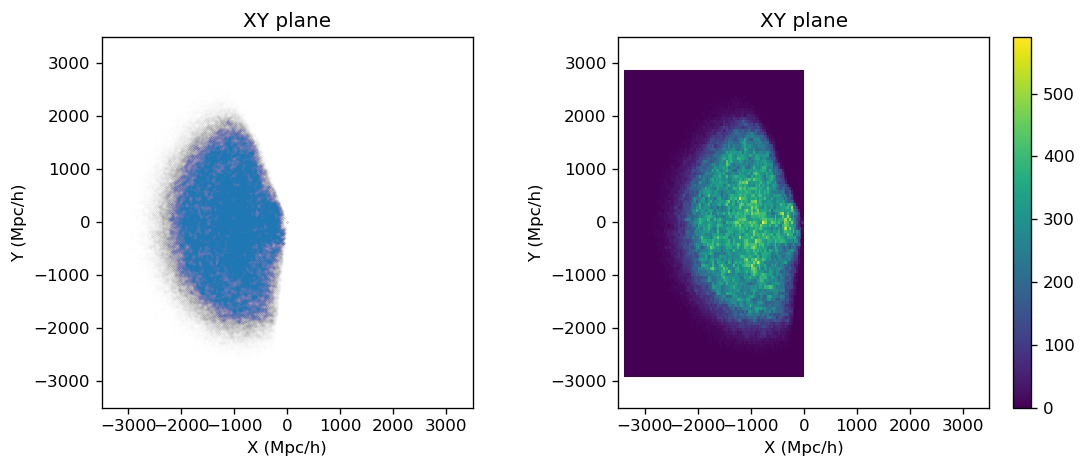

In [12]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['X_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

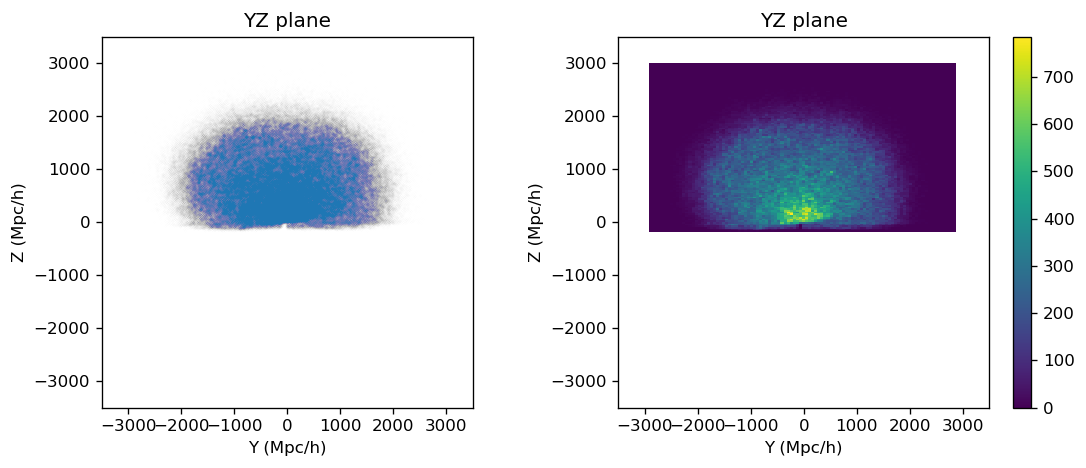

In [13]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

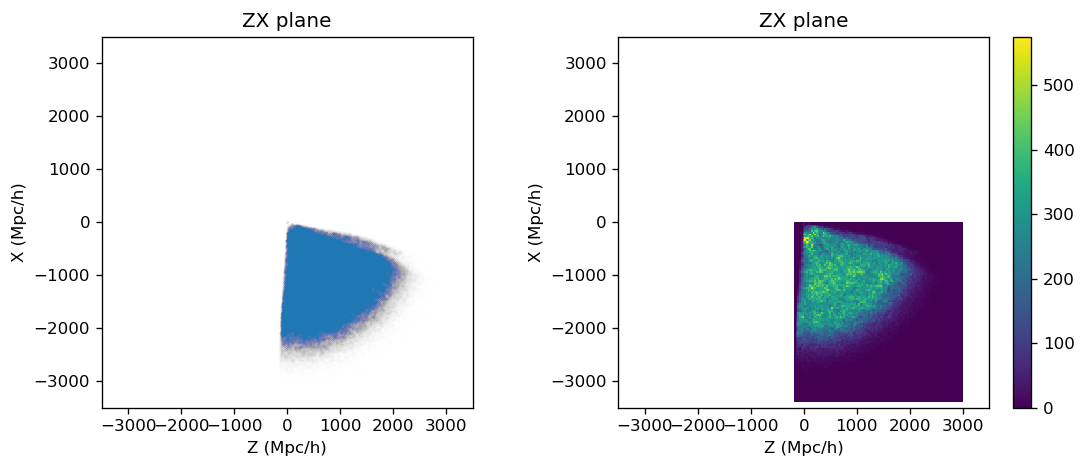

In [14]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
            df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_north_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
           df_north_pos_z['X_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();

**27 July, 2021**  
**Task** Include southern galaxies as well.  
**Task** Use WHL clusters.  
**Task** Attend ACT workshop. They'll show how to use ACT cluster catalog which is better than Planck and overlaps with SLOAN skys. In the end if we want to make a physical conclusion about custers velocity error and tau error, this will be a good data set. We can use this WHL catalog but this are optical catalog. Planck map is actually very good because of many frequencies but sensitivity or resolution is much worse.

We will use some kind of CMB data to draw conclusions about gas mass or optical depth etc.

If mass trend is there, then people have been underestimating the velocities and overestimating the gas mass. This can an interesting result.

In [15]:
%%time

table = Table.read(data_address + 'SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South.fits', format='fits')

names = [name for name in table.colnames if len(table[name].shape) <= 1]
df_south = table[names].to_pandas()

print(datetime.now())
df_south.describe()

2021-08-25 12:33:41.454198
CPU times: user 480 ms, sys: 1.54 s, total: 2.02 s
Wall time: 2.65 s


,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.00000,372601.000000,372601.000000,372601.000000,372601.000000,...,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000,372601.000000
mean,162.780357,11.300913,6738.093553,3.443458,174.302997,559.43804,21.478327,22727.812921,6348.021994,1.311377,...,0.000372,0.984833,5200.196374,494.962697,55867.548386,21.909960,12588.143108,0.000590,74359.359325,1.167879
std,161.256804,11.972804,1903.044050,1.616832,126.042197,328.90751,9.759224,7719.568838,3606.539332,0.220202,...,0.000284,0.018634,1358.198957,285.779914,826.499099,9.792409,3274.395204,0.024292,85187.339130,0.786369
min,0.000091,-10.997172,94.000000,1.000000,11.000000,3.00000,9.000000,7366.000000,1755.000000,1.000512,...,0.000000,0.800000,371.000000,1.000000,51782.000000,9.000000,0.000000,0.000000,-1.000000,-1.000000
25%,16.283820,1.174385,5641.000000,2.000000,79.000000,310.00000,12.000000,15931.000000,2873.000000,1.137283,...,0.000260,0.969828,4347.000000,248.000000,55539.000000,12.000000,10885.000000,0.000000,11179.000000,1.000000
50%,34.528532,9.683856,7767.000000,3.000000,138.000000,525.00000,19.000000,24092.000000,5845.000000,1.268831,...,0.000344,0.994595,5061.000000,489.000000,55923.000000,19.000000,13590.000000,0.000000,35440.000000,1.000000
75%,340.592723,21.144423,7913.000000,5.000000,243.000000,745.00000,32.000000,29577.000000,9953.000000,1.453965,...,0.000395,1.000000,6255.000000,744.000000,56267.000000,32.000000,15156.000000,0.000000,118038.000000,1.000000
max,359.998608,36.236754,8162.000000,6.000000,755.000000,2928.00000,38.000000,33071.000000,12839.000000,2.022085,...,0.018855,1.000000,7248.000000,1000.000000,56693.000000,39.000000,15743.000000,1.000000,368370.000000,18.000000


2021-08-25 12:33:42.312617


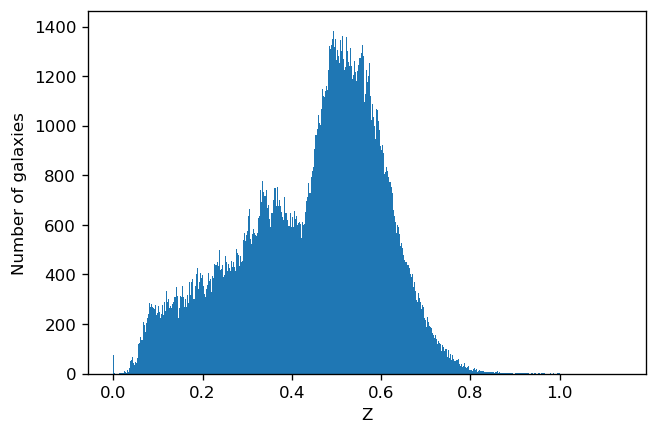

In [16]:
plt.figure(dpi = dpi)
plt.hist(df_south['Z'], bins = 1000);
plt.xlabel('Z')
plt.ylabel('Number of galaxies')
print(datetime.now())

In [41]:
df_south_pos_z = df_south[df_south['Z'] > 0].copy()
df_south_pos_z.describe()

,RA,DEC,RUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,AIRMASS,...,NZ,COMP,PLATE,FIBERID,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,...,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,6738.073959,3.443531,174.309681,559.501015,21.478569,22728.310424,6348.139101,1.311401,...,0.000372,0.984832,5200.192639,494.953157,55867.539630,21.910177,12588.097374,0.000591,74361.058772,1.167895
std,161.256249,11.972713,1903.087506,1.616848,126.044480,328.892511,9.759249,7719.479105,3606.586464,0.220203,...,0.000284,0.018634,1358.252564,285.780436,826.548107,9.792451,3274.555314,0.024294,85190.138130,0.786424
min,0.000091,-10.997172,94.000000,1.000000,11.000000,3.000000,9.000000,7366.000000,1755.000000,1.000512,...,0.000000,0.800000,371.000000,1.000000,51782.000000,9.000000,0.000000,0.000000,-1.000000,-1.000000
25%,16.281862,1.173705,5641.000000,2.000000,79.000000,310.000000,12.000000,15931.000000,2873.000000,1.137327,...,0.000260,0.969828,4347.000000,248.000000,55539.000000,12.000000,10885.000000,0.000000,11179.000000,1.000000
50%,34.522996,9.683287,7767.000000,3.000000,138.000000,525.000000,19.000000,24092.000000,5845.000000,1.268832,...,0.000344,0.994595,5061.000000,489.000000,55923.000000,19.000000,13590.000000,0.000000,35439.500000,1.000000
75%,340.593408,21.142082,7913.000000,5.000000,243.000000,745.000000,32.000000,29577.000000,9953.000000,1.454039,...,0.000395,1.000000,6255.000000,744.000000,56267.000000,32.000000,15156.000000,0.000000,118040.750000,1.000000
max,359.998608,36.236754,8162.000000,6.000000,755.000000,2928.000000,38.000000,33071.000000,12839.000000,2.022085,...,0.018855,1.000000,7248.000000,1000.000000,56693.000000,39.000000,15743.000000,1.000000,368370.000000,18.000000


In [43]:
%%time

df_south_pos_z['r_comov[Mpc]'] =  cosmo.comoving_distance(df_south_pos_z['Z']).value


c = SkyCoord(ra = df_south_pos_z['RA'] * u.degree, 
             dec = df_south_pos_z['DEC'] * u.degree, 
             distance = df_south_pos_z['r_comov[Mpc]'])


df_south_pos_z['X_comov[Mpc]'] =  c.cartesian.x.value
df_south_pos_z['Y_comov[Mpc]'] =  c.cartesian.y.value
df_south_pos_z['Z_comov[Mpc]'] =  c.cartesian.z.value

df_south_pos_z.head()

CPU times: user 27.7 s, sys: 359 ms, total: 28 s
Wall time: 28.1 s


,RA,DEC,RUN,RERUN,CAMCOL,FIELD,ID,ICHUNK,IPOLY,ISECT,...,MJD,FINALN,SPECTILE,ICOLLIDED,INGROUP,MULTGROUP,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
0,321.480329,9.973440,2507,b'301 ',1,30,517,9,24034,1819,...,55470,9,10408,0,12287,1,1238.001852,953.968264,-759.355526,214.411571
1,321.359691,9.933358,2507,b'301 ',1,30,887,9,24034,1819,...,55470,9,10408,0,9836,1,1806.504102,1389.874079,-1111.123726,311.626664
2,322.614181,10.144496,2507,b'301 ',1,38,426,9,24034,1819,...,55470,9,10408,0,4484,1,2206.824985,1726.053261,-1318.990557,388.690833
3,325.011054,10.531999,2507,b'301 ',1,54,1874,9,24037,1839,...,55475,9,10412,0,13060,1,2497.771604,2011.856487,-1408.138721,456.554275
4,325.200214,10.495498,2507,b'301 ',1,55,250,9,24037,1839,...,55475,9,10412,0,15973,1,2005.624031,1619.366597,-1125.480133,365.341008


In [19]:
%%time
df_south_pos_z[['RA', 'DEC', 'Z', 'r_comov[Mpc]', 'X_comov[Mpc]', 'Y_comov[Mpc]', 'Z_comov[Mpc]']].to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South_Comov.csv')

CPU times: user 3.74 s, sys: 71.9 ms, total: 3.81 s
Wall time: 3.83 s


In [20]:
%%time
df_south_pos_z = pd.read_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_South_Comov.csv', 
                index_col = 0)
df_south_pos_z.describe()

CPU times: user 457 ms, sys: 17.6 ms, total: 475 ms
Wall time: 473 ms


,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,0.443913,1728.176717,1542.607732,70.530710,327.868009
std,161.256249,11.972713,0.159550,569.285461,525.129797,631.461384,379.561084
min,0.000091,-10.997172,0.000017,0.073175,0.058214,-2109.863649,-544.978547
25%,16.281862,1.173705,0.334774,1362.912754,1202.417594,-362.129247,29.215022
50%,34.522996,9.683287,0.477807,1871.349470,1638.525592,79.687281,246.301626
75%,340.593408,21.142082,0.560722,2146.730620,1922.614370,514.960085,590.564032
max,359.998608,36.236754,1.136586,3721.922260,3317.236793,2257.024766,1876.492773


In [21]:
df_south_pos_z.head()

,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
0,321.480329,9.973440,0.301401,1238.001852,953.968264,-759.355526,214.411571
1,321.359691,9.933358,0.458872,1806.504102,1389.874079,-1111.123726,311.626664
2,322.614181,10.144496,0.579384,2206.824985,1726.053261,-1318.990557,388.690833
3,325.011054,10.531999,0.672858,2497.771604,2011.856487,-1408.138721,456.554275
4,325.200214,10.495498,0.517716,2005.624031,1619.366597,-1125.480133,365.341008


In [22]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_south_pos_z_sample = df_south_pos_z.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_south_pos_z_sample['X_comov[Mpc]'], 
           df_south_pos_z_sample['Y_comov[Mpc]'], 
           df_south_pos_z_sample['Z_comov[Mpc]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-25 12:34:19.430139


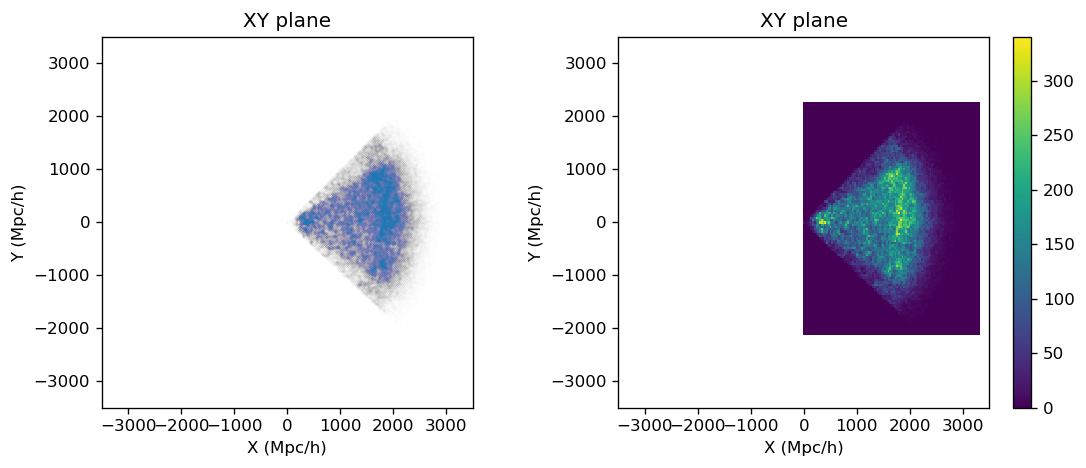

In [23]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['X_comov[Mpc]'][0:no_gal_show], 
            df_south_pos_z['Y_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['X_comov[Mpc]'][0:no_gal_show], 
           df_south_pos_z['Y_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

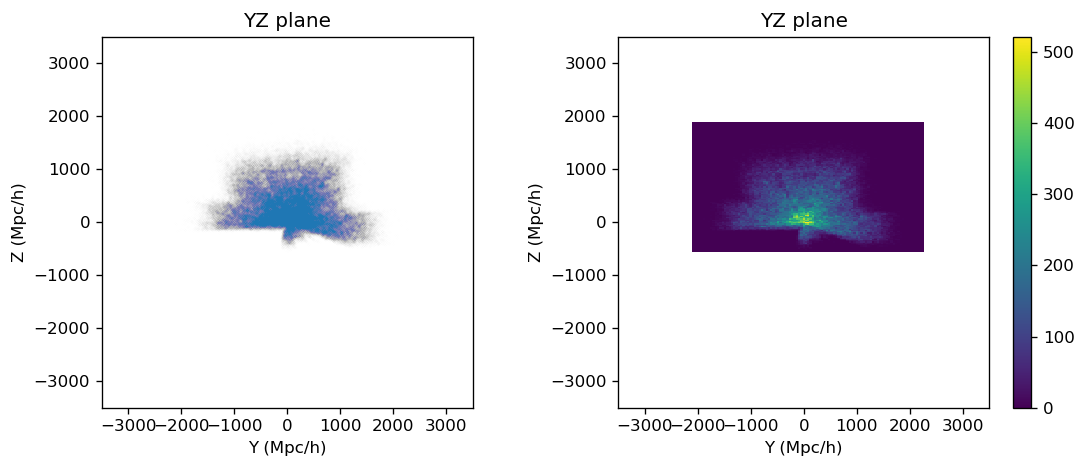

In [24]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
            df_south_pos_z['Z_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['Y_comov[Mpc]'][0:no_gal_show], 
           df_south_pos_z['Z_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

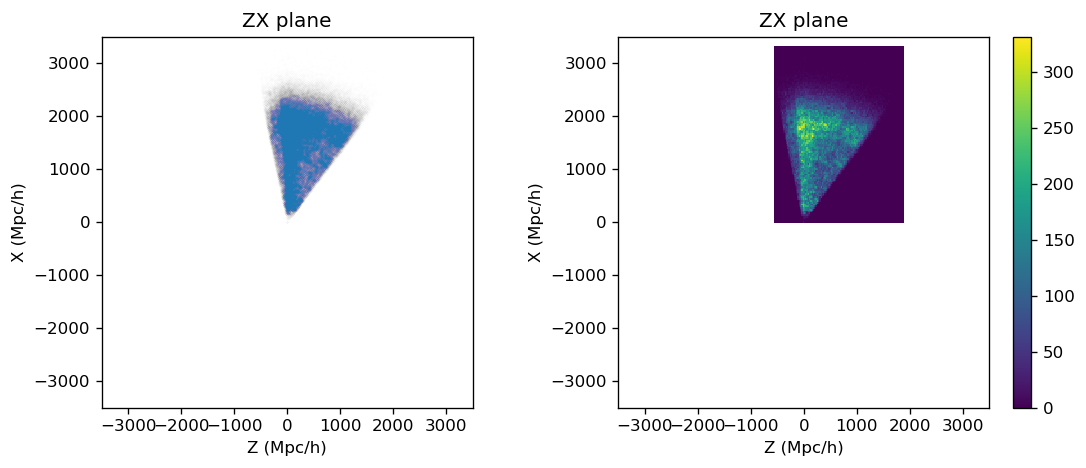

In [25]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_south_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
            df_south_pos_z['X_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_south_pos_z['Z_comov[Mpc]'][0:no_gal_show], 
           df_south_pos_z['X_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();

In [26]:
df_all_sky = df_north_pos_z.append(df_south_pos_z)
df_all_sky.describe()

,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,1.325735e+06,1.325735e+06,1.325735e+06,1.325735e+06,1.325735e+06,1.325735e+06,1.325735e+06
mean,1.786756e+02,2.341721e+01,4.519571e-01,1.757113e+03,-4.022932e+02,-5.054554e+01,6.608391e+02
std,9.219390e+01,1.817975e+01,1.565052e-01,5.574639e+02,1.329136e+03,8.551849e+02,5.469613e+02
min,9.090666e-05,-1.099717e+01,4.893557e-06,2.168267e-02,-3.378717e+03,-2.920029e+03,-5.449785e+02
25%,1.358452e+02,8.360693e+00,3.474941e-01,1.409890e+03,-1.386732e+03,-6.656925e+02,2.081135e+02
50%,1.818909e+02,2.147713e+01,4.862676e-01,1.900086e+03,-8.323960e+02,-2.236855e+01,5.732079e+02
75%,2.273659e+02,3.593965e+01,5.633048e-01,2.155089e+03,7.969326e+02,5.655727e+02,1.039145e+03
max,3.599986e+02,6.873770e+01,1.136586e+00,3.721922e+03,3.317237e+03,2.869830e+03,3.005346e+03


In [27]:
df_north_pos_z.describe()

,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000,953193.000000
mean,184.893933,28.153018,0.455101,1768.422445,-1162.430151,-97.866487,790.976182
std,38.999948,17.995523,0.155186,552.363305,541.366164,923.777075,547.282313
min,108.937131,-3.628120,0.000005,0.021683,-3378.717079,-2920.029412,-172.610167
25%,152.140573,13.151964,0.352676,1428.928716,-1568.792839,-802.107851,328.391313
50%,184.639602,26.954585,0.489364,1910.567302,-1133.389993,-92.733739,728.323746
75%,217.076180,42.384830,0.564200,2157.981688,-744.886229,594.179444,1197.607830
max,263.907507,68.737699,1.002166,3401.013208,-0.004577,2869.829932,3005.345672


In [28]:
df_south_pos_z.describe()

,RA,DEC,Z,r_comov[Mpc],X_comov[Mpc],Y_comov[Mpc],Z_comov[Mpc]
count,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000,372542.000000
mean,162.765378,11.300065,0.443913,1728.176717,1542.607732,70.530710,327.868009
std,161.256249,11.972713,0.159550,569.285461,525.129797,631.461384,379.561084
min,0.000091,-10.997172,0.000017,0.073175,0.058214,-2109.863649,-544.978547
25%,16.281862,1.173705,0.334774,1362.912754,1202.417594,-362.129247,29.215022
50%,34.522996,9.683287,0.477807,1871.349470,1638.525592,79.687281,246.301626
75%,340.593408,21.142082,0.560722,2146.730620,1922.614370,514.960085,590.564032
max,359.998608,36.236754,1.136586,3721.922260,3317.236793,2257.024766,1876.492773


(array([8.5000e+01, 6.0000e+01, 3.2100e+02, 1.1060e+03, 2.1350e+03,
        4.5450e+03, 7.4690e+03, 8.5210e+03, 8.0650e+03, 8.5080e+03,
        9.1830e+03, 9.7240e+03, 9.5740e+03, 9.5980e+03, 9.9280e+03,
        1.0912e+04, 1.1127e+04, 1.1779e+04, 1.1607e+04, 1.3161e+04,
        1.4140e+04, 1.3583e+04, 1.3873e+04, 1.4408e+04, 1.4826e+04,
        1.6079e+04, 1.8173e+04, 1.9227e+04, 2.1502e+04, 2.4353e+04,
        2.3950e+04, 2.3329e+04, 2.2772e+04, 2.1490e+04, 2.0663e+04,
        2.0522e+04, 2.0719e+04, 2.1861e+04, 2.5476e+04, 3.1295e+04,
        3.5572e+04, 4.1742e+04, 4.6023e+04, 4.9410e+04, 5.0879e+04,
        5.0120e+04, 5.0096e+04, 4.8357e+04, 4.6636e+04, 4.5493e+04,
        4.0639e+04, 3.7362e+04, 3.5083e+04, 3.1205e+04, 2.8110e+04,
        2.3956e+04, 2.0774e+04, 1.7582e+04, 1.5205e+04, 1.2538e+04,
        1.0550e+04, 8.5710e+03, 7.0700e+03, 5.5720e+03, 4.3640e+03,
        3.4100e+03, 2.6110e+03, 2.0050e+03, 1.3460e+03, 9.9700e+02,
        6.6100e+02, 5.1600e+02, 3.7800e+02, 2.57

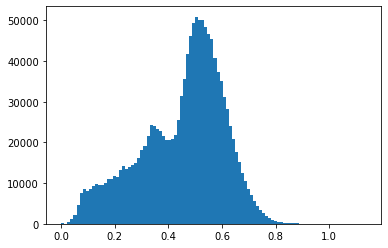

In [45]:
plt.hist(df_all_sky['Z'], bins = 100)

In [29]:
df_all_sky.to_csv('Data/SAS_FITS/galaxy_DR12v5_CMASSLOWZTOT_all_sky_Comov.csv')

In [30]:
# %matplotlib qt
# %matplotlib notebook
# %matplotlib inline
# %pylab qt
%matplotlib

fig = plt.figure(dpi = dpi)
ax = fig.add_subplot(projection='3d')

no_gal_show = 10000

df_all_sky_sample = df_all_sky.sample(n = no_gal_show, replace = False, 
                                               random_state = 0)  

ax.scatter(df_all_sky_sample['X_comov[Mpc]'], 
           df_all_sky_sample['Y_comov[Mpc]'], 
           df_all_sky_sample['Z_comov[Mpc]'],
           s = 0.2, alpha = 0.2);

ax.set_xlabel('X (Mpc/h)', labelpad = 4)
ax.set_ylabel('Y (Mpc/h)', labelpad = 8)
ax.set_zlabel('Z (Mpc/h)', labelpad = 8)

low_lim, high_lim = -3500, 3500
ax.set_xlim(low_lim, high_lim)
ax.set_ylim(low_lim, high_lim)
ax.set_zlim(low_lim, high_lim)

plt.title('Distribution of SDSS galaxies')

print(datetime.now())
plt.show()

Using matplotlib backend: Qt5Agg
2021-08-25 12:34:36.527632


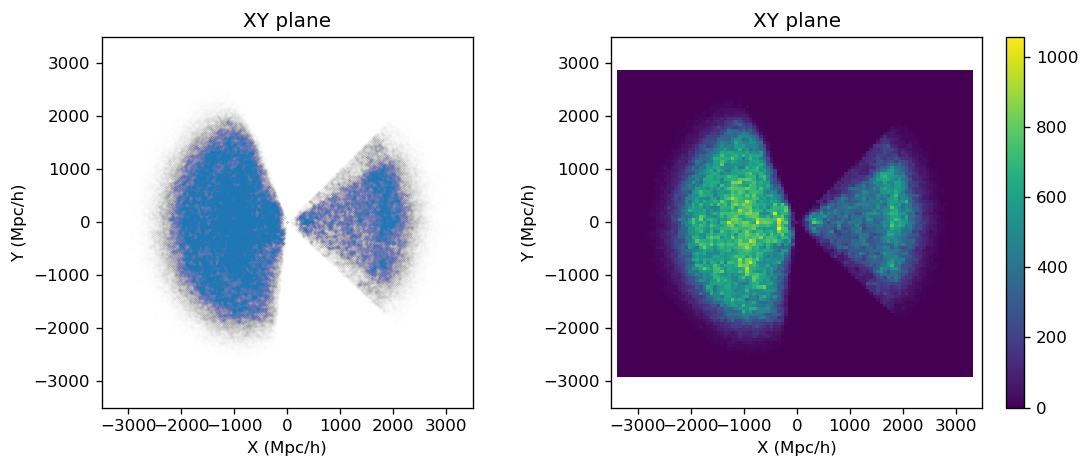

In [31]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['X_comov[Mpc]'][0:no_gal_show], 
            df_all_sky['Y_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane');

plt.subplot(122)
plt.hist2d(df_all_sky['X_comov[Mpc]'][0:no_gal_show], 
           df_all_sky['Y_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('X (Mpc/h)')
plt.ylabel('Y (Mpc/h)')
plt.title('XY plane')
plt.colorbar()

plt.tight_layout();

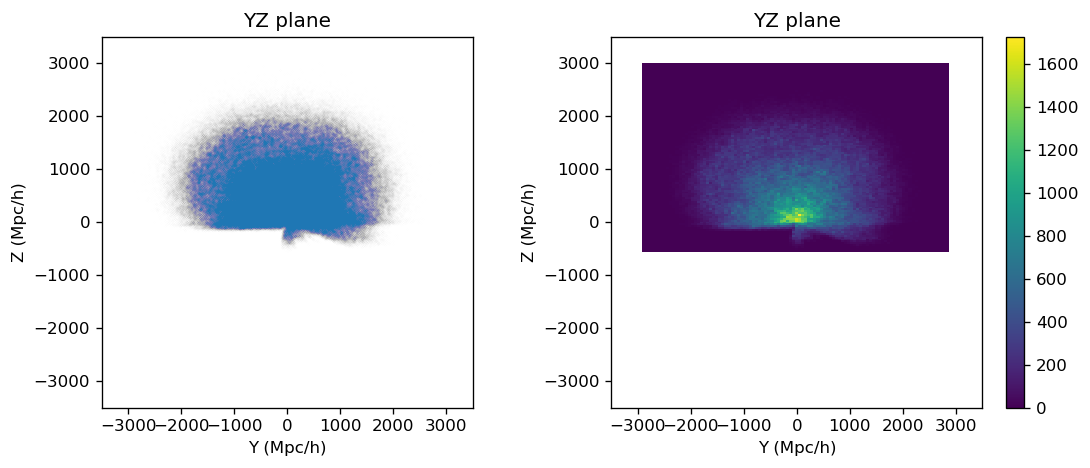

In [32]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['Y_comov[Mpc]'][0:no_gal_show], 
            df_all_sky['Z_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane');

plt.subplot(122)
plt.hist2d(df_all_sky['Y_comov[Mpc]'][0:no_gal_show], 
           df_all_sky['Z_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Y (Mpc/h)')
plt.ylabel('Z (Mpc/h)')
plt.title('YZ plane')
plt.colorbar()

plt.tight_layout();

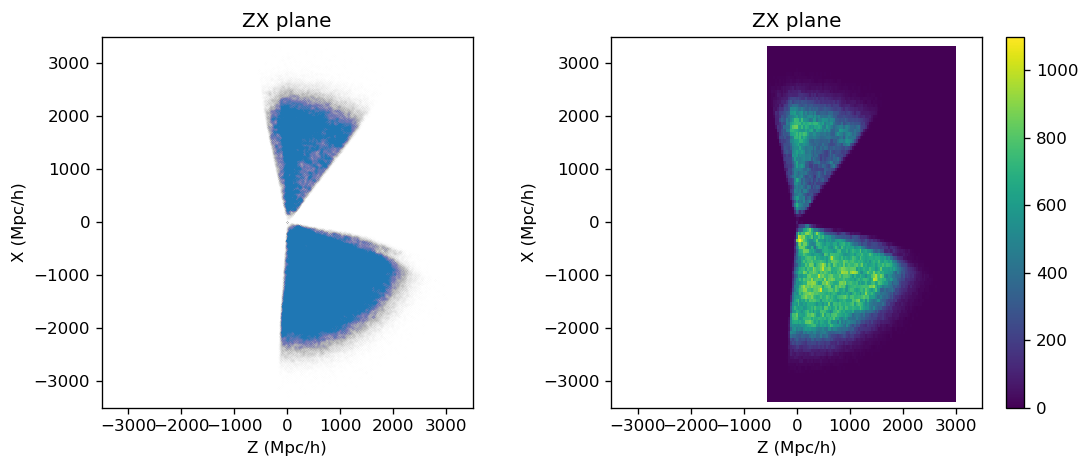

In [33]:
%matplotlib inline

plt.figure(dpi = dpi * 1, figsize = (9.5, 4))

plt.subplot(121)
no_gal_show = -1
plt.scatter(df_all_sky['Z_comov[Mpc]'][0:no_gal_show], 
            df_all_sky['X_comov[Mpc]'][0:no_gal_show],
            s = 0.005, alpha = 0.02)
plt.gca().set_aspect('equal', adjustable='box')
low_lim, high_lim = -3500, 3500
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane');

plt.subplot(122)
plt.hist2d(df_all_sky['Z_comov[Mpc]'][0:no_gal_show], 
           df_all_sky['X_comov[Mpc]'][0:no_gal_show],
           bins = 100)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(low_lim, high_lim)
plt.ylim(low_lim, high_lim)
plt.gca().set_xticks(range(-3000, 3000 + 1, 1000))
plt.xlabel('Z (Mpc/h)')
plt.ylabel('X (Mpc/h)')
plt.title('ZX plane')
plt.colorbar()

plt.tight_layout();